## Homework 2

Name: Indumathi Desabathina
<br>
ID: u1265976

## Question1

####  Problem Satement

The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. <br>Class 01 refers to 'normal' ECG.<br>
Classes 02 to 15 refers to different classes of arrhythmia .<br>
Class 16 refers to the rest of unclassified ones. <br>


The motto of the project is to built differnet machine learning models and neural netwoek to perfomr the classification.

Dataset : https://archive.ics.uci.edu/ml/datasets/Arrhythmia

#### Dataset Specification

This database contains 279 attributes, 206 of which are linear valued and the rest are nominal.


1 Age: Age in years , linear <br>
2 Sex: Sex (0 = male; 1 = female) , nominal <br>
3 Height: Height in centimeters , linear <br>
4 Weight: Weight in kilograms , linear <br>
5 QRS duration: Average of QRS duration in msec., linear<br>
6 P-R interval: Average duration between onset of P and Q waves in msec., linear <br>
7 Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear <br>
8 T interval: Average duration of T wave in msec., linear <br>
9 P interval: Average duration of P wave in msec., linear <br>
Vector angles in degrees on front plane of:, linear <br>
10 QRS <br>
11 T <br>
12 P <br>
13 QRST <br>
14 J<br>

15 Heart rate: Number of heart beats per minute ,linear
<br>
Of channel DI:
Average width, in msec., of: linear
16 Q wave <br>
17 R wave <br>
18 S wave <br>
19 R' wave, small peak just after R <br>
20 S' wave <br>
<br>
21 Number of intrinsic deflections, linear
<br>
22 Existence of ragged R wave, nominal
<br>
23 Existence of diphasic derivation of R wave, nominal
<br>
24 Existence of ragged P wave, nominal
<br>
25 Existence of diphasic derivation of P wave, nominal
<br>
26 Existence of ragged T wave, nominal
<br>
27 Existence of diphasic derivation of T wave, nominal
<br>
Of channel DII:
<br>
28 .. 39 (similar to 16 .. 27 of channel DI)
<br>
Of channels DIII:
<br>
40 .. 51
<br>
Of channel AVR:
52 .. 63
<br>
Of channel AVL:
64 .. 75
<br>
Of channel AVF:
76 .. 87
<br>
Of channel V1:
88 .. 99
<br>
Of channel V2:
100 .. 111
<br>
Of channel V3:
112 .. 123
<br>
Of channel V4:
124 .. 135
<br>
Of channel V5:
136 .. 147
<br>
Of channel V6:
148 .. 159

<br>
Of channel DI:
Amplitude , * 0.1 milivolt, of

160 JJ wave, linear <br>
161 Q wave, linear <br>
162 R wave, linear <br>
163 S wave, linear <br>
164 R' wave, linear <br>
165 S' wave, linear <br>
166 P wave, linear <br>
167 T wave, linear <br>
<br>
168 QRSA , Sum of areas of all segments divided by 10, ( Area= width * height / 2 ), linear
169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T wave. (If T is diphasic then the bigger segment is considered), linear

<br>
Of channel DII:
170 .. 179
<br>
Of channel DIII:
180 .. 189
<br>
Of channel AVR:
190 .. 199
<br>
Of channel AVL:
200 .. 209
<br>
Of channel AVF:
210 .. 219
<br>
Of channel V1:
220 .. 229
<br>
Of channel V2:
230 .. 239
<br>
Of channel V3:
240 .. 249
<br>
Of channel V4:
250 .. 259
<br>
Of channel V5:
260 .. 269
<br>
Of channel V6:
270 .. 279

#### Project Milestone

Week 1: Exploratory Analysis <br>
week 2: Perform Lietreature Review <br>
Week 3 and 4: Inspect different Validation Techniques <br>
week 5 and 6. Build Machine Learning Models <br>
Week 7 and 8: Develop Neural network with different architecture <br>
week 9: Compare the results of Machine Learning and Deep Learning Models.(Documentation and presentation of results)<br>

## Question2

#### For the flow chart please open the pdf in the present directory.

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 



import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
#Load the Data
data = pd.read_csv('hepatitis.data',header=None)

In [3]:
data.replace('?',np.nan,inplace=True)

In [4]:
X = data[data.columns[1:20]]
y = data[data.columns[0]]

In [5]:
#converting to numeric or continus to float

cat_var = [2,3,4,5,6,7,8,9,10,11,12,13,19]
num_var = [1,14,15,16,17,18]

In [6]:
for i in num_var:
    X.loc[:,i] = X.loc[:,i].astype(float)
for i in cat_var:
    X.loc[:,i] = X.loc[:,i].astype(str)

In [7]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.25, random_state=42)

In [8]:
train_mean={}
train_mode={}
for i in num_var:
    train_mean[i] = X_train[i].mean()
for i in cat_var:
    train_mode[i] = X_train[i].mode()[0] 

In [9]:
#Replacing with mean amd mode in train

for i in num_var:
    X_train.loc[:,i].replace(np.nan,train_mean[i],inplace= True)
for i in cat_var:
    X_train.loc[:,i].replace("nan",train_mode[i],inplace= True)

In [10]:
#Replacing with train mean and mode in test and validation

for i in num_var:
    X_val.loc[:,i].replace(np.nan,train_mean[i],inplace= True)
    X_test.loc[:,i].replace(np.nan,train_mean[i],inplace= True)
    
    
for i in cat_var:
    X_val.loc[:,i].replace("nan",train_mode[i],inplace= True)
    X_test.loc[:,i].replace("nan",train_mode[i],inplace= True)

In [11]:
X_train=pd.get_dummies(X_train)
X_val=pd.get_dummies(X_val)
X_test=pd.get_dummies(X_test)

In [12]:
clf = StandardScaler()

In [13]:
clf.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train = pd.DataFrame(clf.transform(X_train))

In [15]:
X_val = pd.DataFrame(clf.transform(X_val))

In [16]:
X_test = pd.DataFrame(clf.transform(X_test))

# RandomOverSampler

In [17]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

### KNN classifier -RandomOverSampler

In [18]:
#KNN classifier
model = KNeighborsClassifier(n_neighbors=3)  # Load our classifier
model.fit(X_res, y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
prediction_knn = model.predict(X_val)  # Make predictions with our trained model on the test data 
print(f1_score(y_val, prediction_knn) * 100)

71.42857142857143


### Logistic Regression - RandomOverSampler

In [20]:
logreg = LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X_res, y_res)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
prediction_lr = logreg.predict(X_val)
print(f1_score(y_val, prediction_lr) * 100)

50.000000000000014


### RandomForest - RandomOverSampler

In [22]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
prediction_rf = clf.predict(X_val)
print(f1_score(y_val, prediction_rf) * 100)

66.66666666666666


# SMOTE

In [24]:
sm = SMOTE(random_state=42)
X_res_s, y_res_s = sm.fit_resample(X_train, y_train)

### KNN Classifier -SMOTE

In [25]:
#KNN classifier
model_2 = KNeighborsClassifier(n_neighbors=3)  # Load our classifier
model_2.fit(X_res_s, y_res_s)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [26]:
prediction_knn_s = model_2.predict(X_val)  # Make predictions with our trained model on the test data 
print(f1_score(y_val, prediction_knn_s) * 100)

58.82352941176471


### Logistic Regression-SMOTE

In [27]:
logreg_2 = LogisticRegression(C=1e5,solver='liblinear')
logreg_2.fit(X_res_s, y_res_s)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
prediction_lr_s = logreg_2.predict(X_val)
print(f1_score(y_val, prediction_lr_s) * 100)

50.000000000000014


### Random Forest - SMOTE

In [29]:
clf_2 = RandomForestClassifier(max_depth=2, random_state=0)
clf_2.fit(X_res_s, y_res_s)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
prediction_rf_s = clf_2.predict(X_val)
print(f1_score(y_val, prediction_rf_s) * 100)

57.14285714285714


## ROC of RandomOverSample

In [31]:
prediction_random = model_2.predict(X_test)

In [32]:
print(prediction_random)

[2 1 2 1 2 2 2 2 1 2 2 1 1 1 1 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 1]


In [33]:
print(y_test)

81     2
142    2
31     1
29     2
118    1
60     2
93     2
147    1
153    2
68     2
42     2
138    1
78     2
75     2
15     2
19     2
30     1
90     2
117    2
137    2
18     2
12     2
9      2
24     2
69     2
131    1
95     2
45     2
86     1
84     2
126    2
Name: 0, dtype: int64


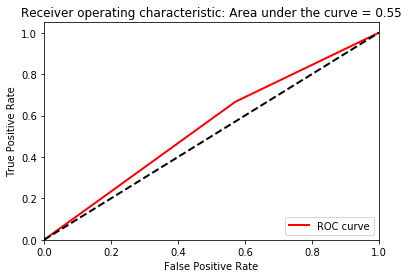

In [33]:
fpr, tpr, thresholds = roc_curve(y_test,prediction_random,pos_label=2)
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## ROC of SMOTE

In [38]:
prediction_smote= model_2.predict(X_test)

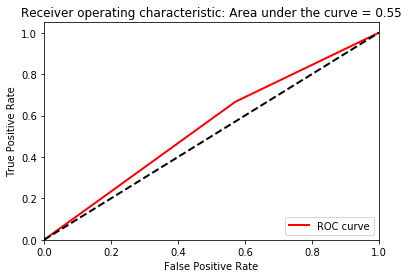

In [39]:
fpr, tpr, thresholds = roc_curve(y_test,prediction_smote,pos_label=2)
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()